In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Housing.csv")
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
# Mapping 
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

In [6]:
data['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

### onehotEncoding to Furnishingstatus

In [7]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data[['furnishingstatus']])
encoded_df = pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out())
data = pd.concat([data.drop('furnishingstatus',axis=1),encoded_df],axis=1)

In [8]:
data.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.0,0.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.0,0.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.0,1.0,0.0


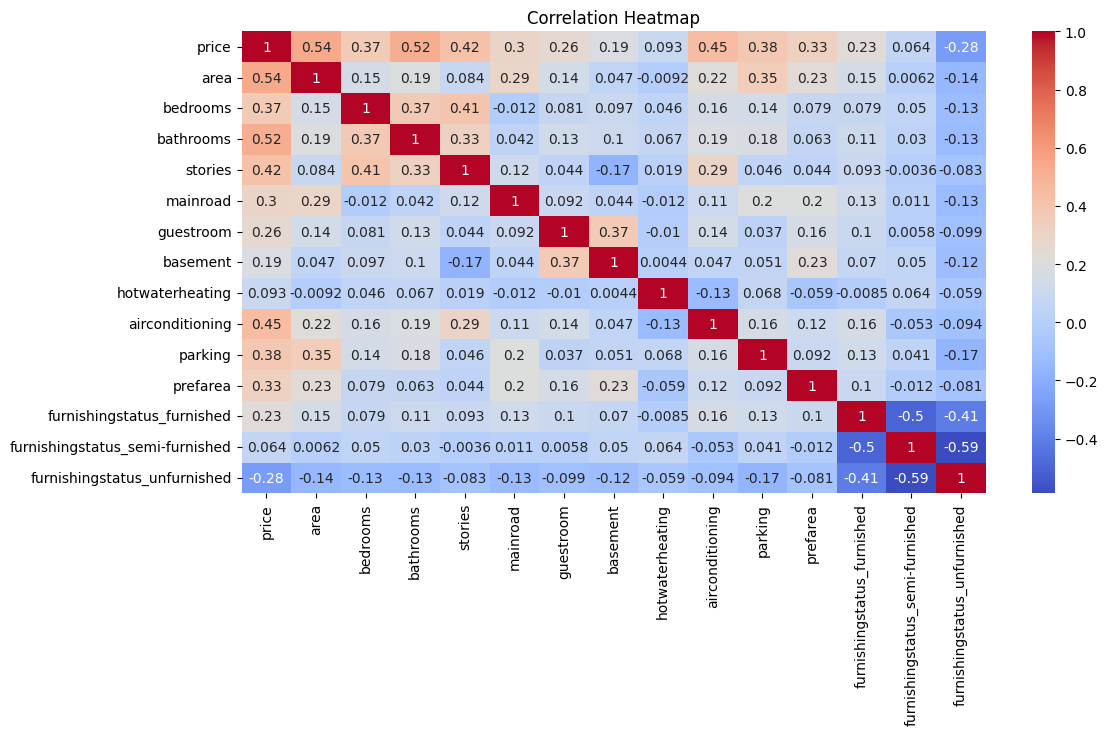

In [9]:
# Heatmap
corr = data.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr,cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")
plt.show()

# Detecting outliers

Text(0.5, 1.0, 'Box plot Before removing outliers')

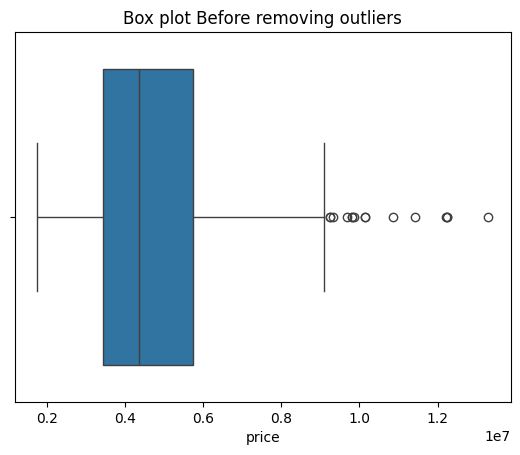

In [10]:
sns.boxplot(x=data['price'])
plt.title("Box plot Before removing outliers")

###  Using SciPy’s zscore() function for removing outliers

In [11]:
from scipy.stats import zscore

# Calculate z-scores
z_scores = zscore(data['price'])

# Identify outliers (|z| > 2)
data = data[np.abs(z_scores) <= 2]
data.shape

(519, 15)

Text(0.5, 1.0, 'Box plot after removing outliers')

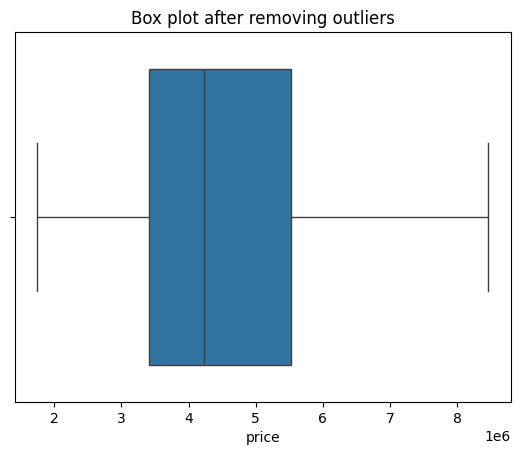

In [12]:
sns.boxplot(x=data['price'])
plt.title("Box plot after removing outliers")

### Separating input values as x and output values as y

In [13]:
X = data.drop('price',axis=1)
y = data['price']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### scaling the values of area using MinMaxScaler

In [15]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
X_train['area'] = scalar.fit_transform(X_train[['area']])
X_test['area'] = scalar.transform(X_test[['area']])

In [16]:
X_train.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
459,0.132616,2,1,1,1,0,0,0,0,0,0,0.0,0.0,1.0
543,0.090323,3,1,1,0,0,0,0,0,0,0,1.0,0.0,0.0


In [17]:
X_test.head(2)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
301,0.134050,3,1,2,1,0,0,0,0,0,1,0.0,1.0,0.0
119,0.384946,3,1,1,1,0,1,0,1,2,1,0.0,1.0,0.0


### fitting to the LinearRegression

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_test

301    4200000
119    5950000
32     8295000
193    5033000
116    6020000
        ...   
95     6300000
383    3570000
448    3150000
360    3710000
253    4515000
Name: price, Length: 104, dtype: int64

In [20]:
y_pred = model.predict(X_test)
y_pred

array([4233994.00184735, 5800927.13397874, 6144093.99658027,
       4062067.53957769, 5383228.86340383, 2867961.25383165,
       3384078.71331457, 5081496.00907273, 4740041.54607502,
       2857347.24205387, 5170327.73554523, 5020115.24765112,
       3641634.65287747, 3113313.10673868, 6767354.65744337,
       4320001.96514529, 3843073.5019748 , 6382692.86768234,
       3570760.44080332, 5792951.03164914, 5666722.69667429,
       5303032.15032014, 5170726.81387542, 5021643.48223876,
       4035869.37605197, 4250649.54391138, 5199261.98265123,
       3151940.22200844, 4115308.88156449, 3792588.16986104,
       3500228.08143909, 3413149.86236429, 3078561.44735905,
       7092258.9881132 , 4996331.48673608, 6116134.92117234,
       3550492.50370147, 6567256.73079962, 4464363.34397705,
       5769260.19595205, 4553798.74888161, 4251019.15922394,
       5675544.38670479, 3239547.67882981, 3427401.21036671,
       4840923.49976653, 4624259.97305041, 4431378.32075621,
       4694700.22404699,

### calculating accuracy using R2 Score

In [21]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.6810851008651511


### Pickle is used here to save train model. When we have a large datasets, training takes time. So we train the model once and save it using pickle, and later use the saved model for prediction/testing without retraining.

In [22]:
import pickle

In [23]:
with open("model.pkl",'wb') as f:
    pickle.dump(model,f)

In [24]:
with open("scalar.pkl",'wb') as f:
    pickle.dump(scalar,f)